## 1. Setup and Data Loading
I begin by importing the necessary libraries and loading the dataset into a pandas DataFrame.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('Verified_Processed_Dataset.csv')
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print("Make sure 'Verified_Processed_Dataset.csv' is in the same directory.")

# Set plot style
sns.set_style("whitegrid")
print("Dataset loaded successfully.")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully.
Dataset shape: (8246, 32)


## 1.1 Initial Data Profiling
Before cleaning my data, I first perform an initial exploration. This helps me understand the raw data’s structure, identify potential issues, and formulate a strategy for cleaning.

### 1.1.1 Dataset Shape and Data Types
Let's start with the basics: how large is the dataset, and what data types did pandas infer for each column?

In [31]:
# Display the shape (rows, columns) of the dataframe
print(f"Dataset Shape: {df.shape}")

# Display a summary of the dataframe, including data types and non-null counts
print("\nInitial Data Types and Info:")
df.info()

Dataset Shape: (8246, 32)

Initial Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Learner SignUp DateTime          8246 non-null   object 
 1   Opportunity Id                   8246 non-null   object 
 2   Opportunity Name                 8246 non-null   object 
 3   Opportunity Category             8246 non-null   object 
 4   Opportunity End Date             8246 non-null   object 
 5   First Name                       8246 non-null   object 
 6   Date of Birth                    8246 non-null   object 
 7   Gender                           8246 non-null   object 
 8   Country                          8246 non-null   object 
 9   Institution Name                 8246 non-null   object 
 10  Current/Intended Major           8246 non-null   object 
 11  Entry created at          

**Observation:**

* The dataset has 8,246 rows and 32 columns.
* Crucially, several date-related columns (`Learner SignUp DateTime`, `Opportunity End Date`, `Date of Birth`, `Apply Date`, `Opportunity Start Date`) have been loaded as string (`object`) data types.
* I will convert these columns to the proper `datetime` format for any time-based analysis.

### 1.1.2 Descriptive Statistics for Numerical Data
Summary statistics give me a quick overview of the distribution of my numerical columns. I can look for strange values, like a standard deviation of zero, which indicates a column with no variance.

In [32]:
# Display descriptive statistics for all numerical columns
print("Descriptive Statistics for Numerical Columns:")
df.describe()

Descriptive Statistics for Numerical Columns:


,Status Code,Age,Opportunity Duration,Normalized Age,Normalized Status Code,Normalized Opportunity Duration,Encoded Gender,Encoded Opportunity Category,Encoded Country,Extracted SignUp month,Extracted SignUp Year,Extracted SignUp Day,Engagement Days,Duration × Age,Engagement Score
count,8246.000000,8246.000000,8246.000000,8246.000000,8246.000000,8246.0,8246.000000,8246.000000,8246.000000,8246.000000,8246.000000,8246.000000,8246.000000,8246.000000,8246.000000
mean,1052.186515,25.456706,486.503292,0.326891,0.239164,0.0,1.413049,1.575309,2.207858,5.574460,2023.322338,15.847926,271.928415,11255.051332,1120.988366
std,21.665849,4.336149,34.580794,0.151775,0.240992,0.0,0.498288,0.927495,2.084560,3.634879,0.467400,8.525489,191.591826,4477.947762,625.582652
min,1010.000000,14.000000,430.470874,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,2023.000000,1.000000,0.000000,3951.829720,37.893238
25%,1030.000000,23.000000,468.575579,0.227273,0.000000,0.0,1.000000,1.000000,1.000000,2.000000,2023.000000,8.000000,9.074826,9879.574306,903.318540
50%,1050.000000,25.000000,493.978715,0.318182,0.142857,0.0,1.000000,1.000000,2.000000,6.000000,2023.000000,16.000000,326.976047,12080.305560,1326.818928
75%,1070.000000,27.000000,493.978715,0.409091,0.428571,0.0,2.000000,2.000000,2.000000,8.000000,2024.000000,23.000000,442.295223,13831.404030,1480.268741
max,1120.000000,59.000000,532.083420,0.681818,1.142857,0.0,4.000000,5.000000,11.000000,12.000000,2024.000000,31.000000,493.692349,19759.148616,2345.694043


**Observation:**
* The `Normalized Opportunity Duration` column has a standard deviation, minimum, mean, and maximum all equal to 0. This means the column contains the exact same value for every single row.
* **Justification for Cleaning:** A column with no variance provides no information for analysis or modeling. This justifies my decision to remove the `Normalized Opportunity Duration` column.

### 1.1.3 Initial Check for Missing Values
Let's see if there are any missing values in the raw data.

In [33]:
# Display the count of null values for each column
print("Initial Count of Missing Values per Column:")
print(df.isnull().sum())

Initial Count of Missing Values per Column:
Learner SignUp DateTime            0
Opportunity Id                     0
Opportunity Name                   0
Opportunity Category               0
Opportunity End Date               0
First Name                         0
Date of Birth                      0
Gender                             0
Country                            0
Institution Name                   0
Current/Intended Major             0
Entry created at                   0
Status Description                 0
Status Code                        0
Apply Date                         0
Opportunity Start Date             0
Age                                0
Opportunity Duration               0
Normalized Age                     0
Normalized Status Code             0
Normalized Opportunity Duration    0
Encoded Gender                     0
Encoded Opportunity Category       0
Encoded Country                    0
Extracted SignUp month             0
Extracted SignUp Year          

### 1.1.4 Investigate Date Columns for Anomalies
Data entry errors or system defaults can often lead to placeholder dates, like `1900-01-01`. Let's check the `Apply Date` column specifically for such anomalies.

In [34]:
# Sort the 'Apply Date' column to find the earliest dates
print("Earliest Dates in 'Apply Date' Column:")
print(df['Apply Date'].sort_values().head())

Earliest Dates in 'Apply Date' Column:
7408    1/1/1900 0:00
1260    1/1/1900 0:00
3353    1/1/1900 0:00
6064    1/1/1900 0:00
6443    1/1/1900 0:00
Name: Apply Date, dtype: object


**Observation:**

* The `Apply Date` column contains dates from `1900-01-01`. This is clearly a placeholder or default value, not a legitimate application date, and it appears many times.
* **Justification for Cleaning:** These anomalous dates are effectively missing data. They would skew any analysis of application timelines. This justifies my cleaning step to replace `1900-01-01` with a proper null value (`NaT`), which correctly represents missing time-series data.

### 1.1.5 Examine Key Categorical Columns
Understanding the distribution of key categorical variables like `Opportunity Category` and `Status Description` is essential for defining my primary success metric.

In [35]:
# Display value counts for 'Opportunity Category'
print("\nValue Counts for 'Opportunity Category':")
print(df['Opportunity Category'].value_counts())

# Display value counts for 'Status Description'
print("\nValue Counts for 'Status Description':")
print(df['Status Description'].value_counts())


Value Counts for 'Opportunity Category':
Opportunity Category
Internship     5242
Course         1935
Event           526
Competition     415
Engagement      128
Name: count, dtype: int64

Value Counts for 'Status Description':
Status Description
Rejected          3447
Team Allocated    3169
Started            724
Dropped Out        596
Applied            103
Waitlisted          96
Withdraw            82
Rewards Award       29
Name: count, dtype: int64


**Observation:**

* The dataset is heavily weighted towards the ‘Internship’ category.
* The `Status Description` column has several values. ‘Rewards Award’ (a potential success metric) has very few entries (29), while ‘Team Allocated’ has many (3,169).
* **Justification for Cleaning:** This initial look suggests that a single definition of “completion” (e.g., only ‘Rewards Award’) might not be appropriate across all opportunity types. This justifies my later step to create a refined `Is_Completed` metric that uses ‘Team Allocated’ as a success indicator for certain categories.

## 2. Data Cleaning and Preparation
This step involves cleaning my data to ensure its quality and preparing it for analysis. I:

1. Convert date-related columns to the proper `datetime` format.
2. Address anomalous data, such as the `1900-01-01` dates in the `Apply Date` column.
3. Remove columns that do not provide value (e.g., `Normalized Opportunity Duration`).
4. Define a more accurate `Is_Completed` status based on the opportunity category.

In [36]:
# Convert date columns to datetime objects
date_columns = [
    'Learner SignUp DateTime',
    'Opportunity End Date',
    'Date of Birth',
    'Apply Date',
    'Opportunity Start Date'
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Handle anomalous '1900-01-01' date in 'Apply Date' by replacing it with NaT (Not a Time)
df['Apply Date'] = df['Apply Date'].replace(pd.to_datetime('1900-01-01'), pd.NaT)

# Drop the 'Normalized Opportunity Duration' column as it contains no variance
if 'Normalized Opportunity Duration' in df.columns:
    df = df.drop(columns=['Normalized Opportunity Duration'])

# Define a refined function to determine completion status
def is_completed(row):
    if row['Opportunity Category'] in ['Event', 'Course']:
        return row['Status Description'] == 'Rewards Award'
    elif row['Opportunity Category'] in ['Internship', 'Competition', 'Engagement']:
        return row['Status Description'] == 'Team Allocated'
    return False

df['Is_Completed'] = df.apply(is_completed, axis=1)

print("Data cleaning and preparation complete.")
print("\nMissing values in 'Apply Date' after cleaning:")
print(df['Apply Date'].isnull().sum())
print("\nDataFrame Info after cleaning:")
df.info()

Data cleaning and preparation complete.

Missing values in 'Apply Date' after cleaning:
245

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Learner SignUp DateTime       8246 non-null   datetime64[ns]
 1   Opportunity Id                8246 non-null   object        
 2   Opportunity Name              8246 non-null   object        
 3   Opportunity Category          8246 non-null   object        
 4   Opportunity End Date          8246 non-null   datetime64[ns]
 5   First Name                    8246 non-null   object        
 6   Date of Birth                 8246 non-null   datetime64[ns]
 7   Gender                        8246 non-null   object        
 8   Country                       8246 non-null   object        
 9   Institution Name              8246 non

## 3. Overall Completion Analysis
With my data cleaned, I analyze the overall completion rate using my refined definition.


Total Signups: 8246
Total Completions (Refined Definition): 1632
Overall Completion Rate (Refined Definition): 19.79%


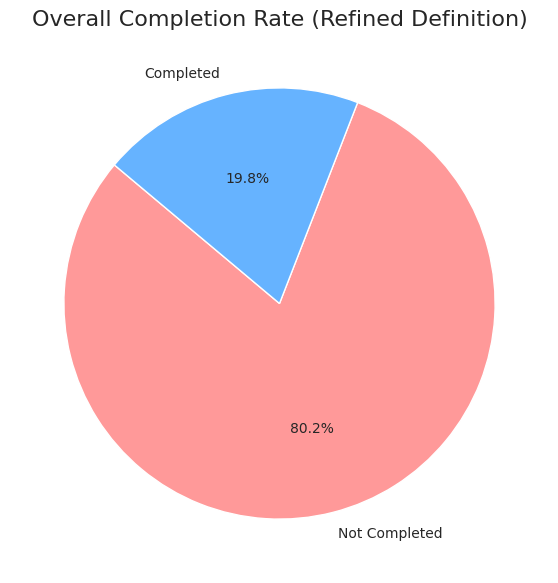

In [37]:
# Calculate and print the overall completion rate
total_signups = df.shape[0]
total_completions_refined = df['Is_Completed'].sum()
completion_rate_refined = (total_completions_refined / total_signups) * 100

print(f"Total Signups: {total_signups}")
print(f"Total Completions (Refined Definition): {total_completions_refined}")
print(f"Overall Completion Rate (Refined Definition): {completion_rate_refined:.2f}%")

# Visualize the overall completion rate with a pie chart
plt.figure(figsize=(7, 7))
completion_counts = df['Is_Completed'].value_counts()
plt.pie(completion_counts, labels=['Not Completed', 'Completed'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Overall Completion Rate (Refined Definition)', fontsize=16)
plt.show()

## 4. Completion Rate by Categorical Variables
I'll break down the completion rate by various categorical variables to identify which groups of learners are more or less likely to complete opportunities.

### 4.1. By Opportunity Category
This helps me understand which types of opportunities are most engaging or have the most achievable success metrics.

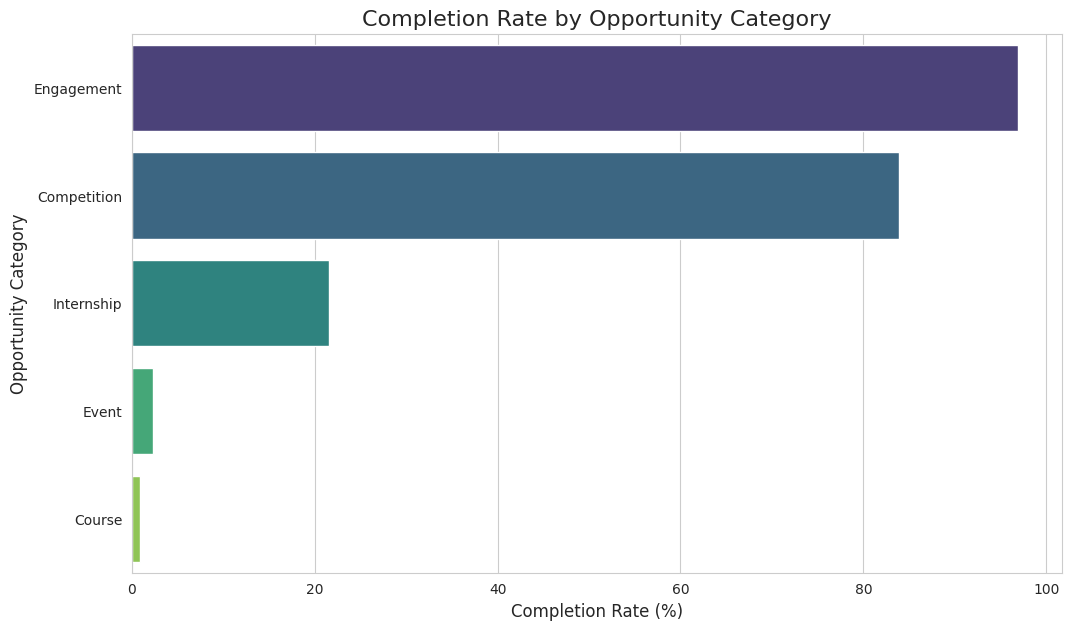

In [38]:
plt.figure(figsize=(12, 7))
# Using the 'as_index=False' or 'include_groups=False' is the modern way
category_completion_refined = df.groupby('Opportunity Category', as_index=False)['Is_Completed'].mean()
category_completion_refined['Completion Rate'] = category_completion_refined['Is_Completed'] * 100

sns.barplot(x='Completion Rate', y='Opportunity Category', data=category_completion_refined.sort_values('Completion Rate', ascending=False), palette='viridis', hue='Opportunity Category', dodge=False)
plt.title('Completion Rate by Opportunity Category', fontsize=16)
plt.xlabel('Completion Rate (%)', fontsize=12)
plt.ylabel('Opportunity Category', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

### 4.2. By Gender
Here, I check for any gender disparity in completion rates.

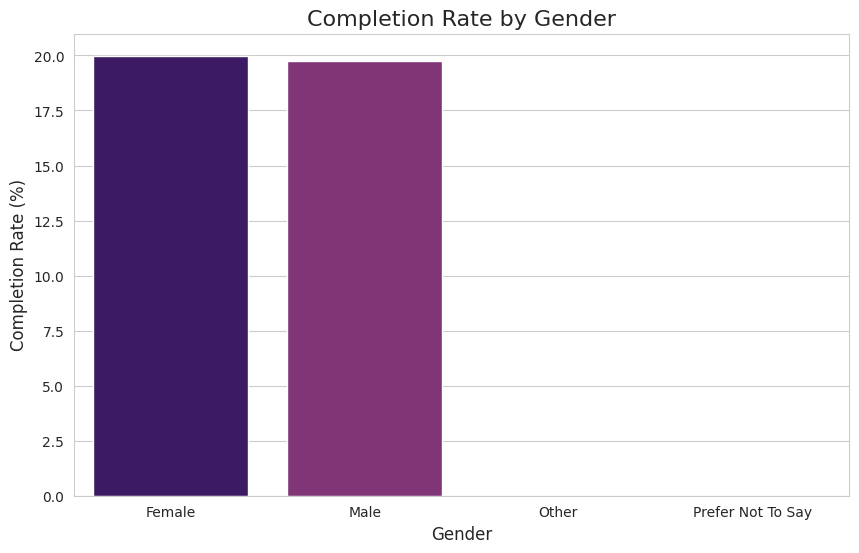

In [39]:
plt.figure(figsize=(10, 6))
gender_completion = df.groupby('Gender', as_index=False)['Is_Completed'].mean()
gender_completion['Completion Rate'] = gender_completion['Is_Completed'] * 100

sns.barplot(x='Gender', y='Completion Rate', data=gender_completion.sort_values('Completion Rate', ascending=False), palette='magma', hue='Gender', dodge=False)
plt.title('Completion Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Completion Rate (%)', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

### 4.3. By Top 10 Countries
This visualization explores geographical variations in learner success.

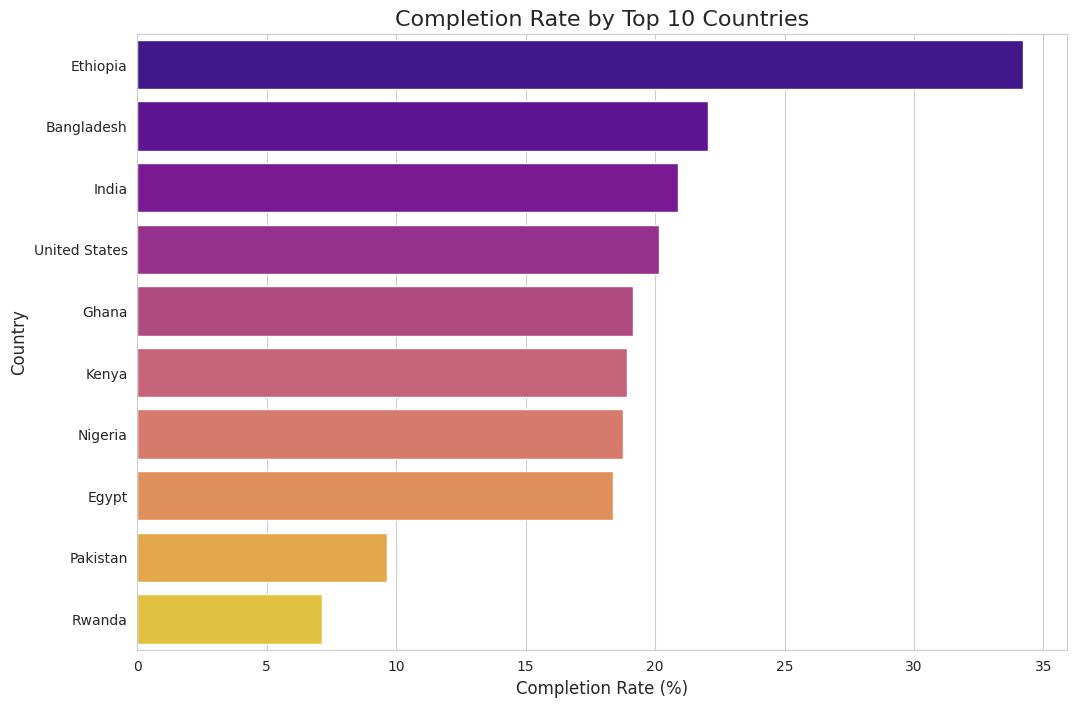

In [40]:
plt.figure(figsize=(12, 8))
top_10_countries = df['Country'].value_counts().head(10).index
country_subset = df[df['Country'].isin(top_10_countries)]

country_completion = country_subset.groupby('Country', as_index=False)['Is_Completed'].mean()
country_completion['Completion Rate'] = country_completion['Is_Completed'] * 100

sns.barplot(x='Completion Rate', y='Country', data=country_completion.sort_values('Completion Rate', ascending=False), palette='plasma', hue='Country', dodge=False)
plt.title('Completion Rate by Top 10 Countries', fontsize=16)
plt.xlabel('Completion Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

## 5. Time-Series Analysis
I examine how signups and completions have trended over time.

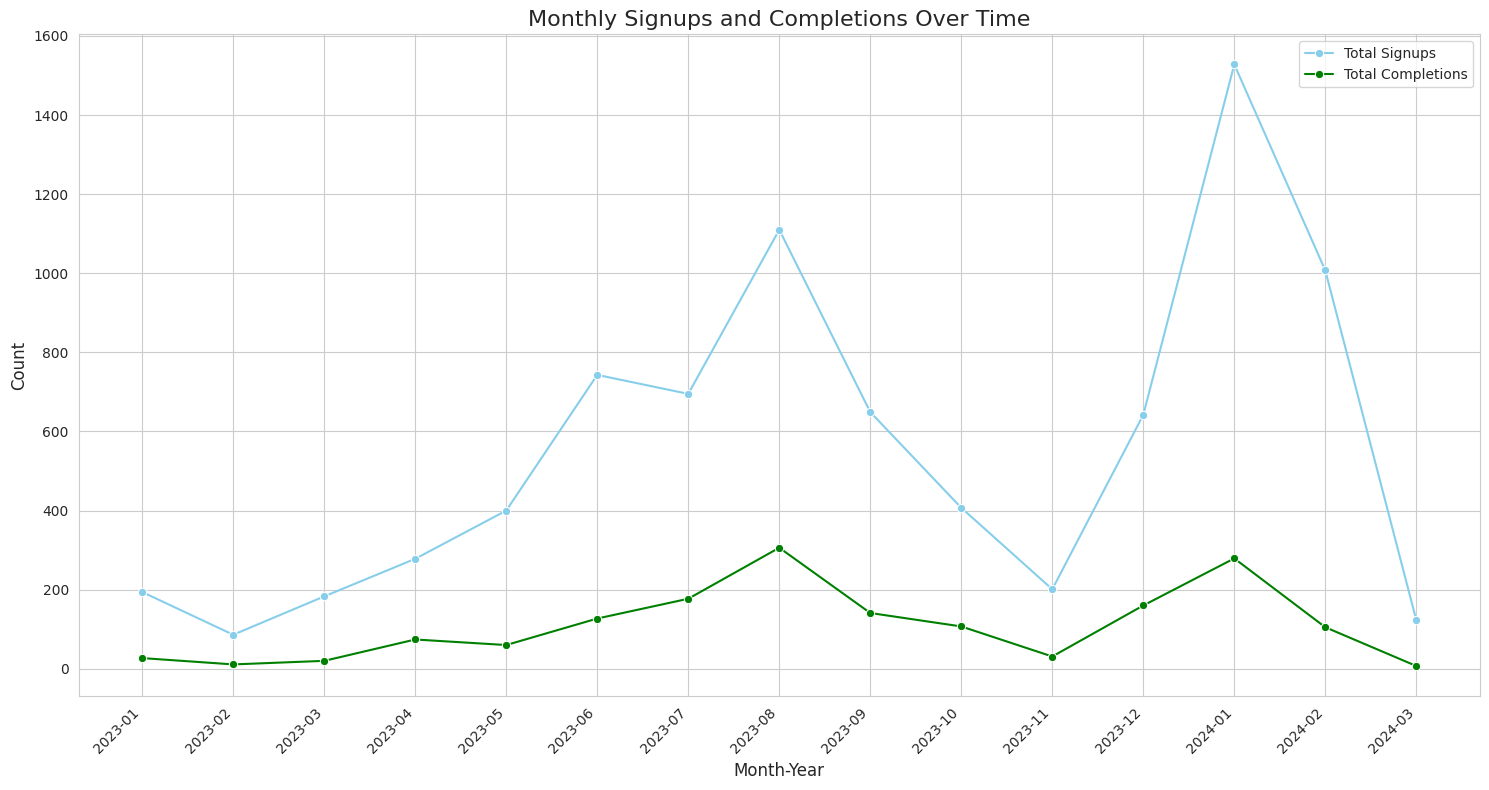

In [41]:
df['Signup_YearMonth'] = df['Learner SignUp DateTime'].dt.to_period('M')
monthly_trends = df.groupby('Signup_YearMonth', as_index=False).agg(
    Total_Signups=('Opportunity Id', 'count'),
    Total_Completions=('Is_Completed', 'sum')
)
# Convert Period to string for plotting
monthly_trends['Signup_YearMonth'] = monthly_trends['Signup_YearMonth'].astype(str)


plt.figure(figsize=(15, 8))
sns.lineplot(x='Signup_YearMonth', y='Total_Signups', data=monthly_trends, marker='o', label='Total Signups', color='skyblue')
sns.lineplot(x='Signup_YearMonth', y='Total_Completions', data=monthly_trends, marker='o', label='Total Completions', color='green')
plt.title('Monthly Signups and Completions Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Analysis of Engagement Metrics
A key finding I noted was that learners who completed opportunities had lower average engagement scores. I'll visualize this surprising relationship more clearly using both box plots and violin plots.

/tmp/ipython-input-873312633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Completed', y=metric, data=df, palette='coolwarm')


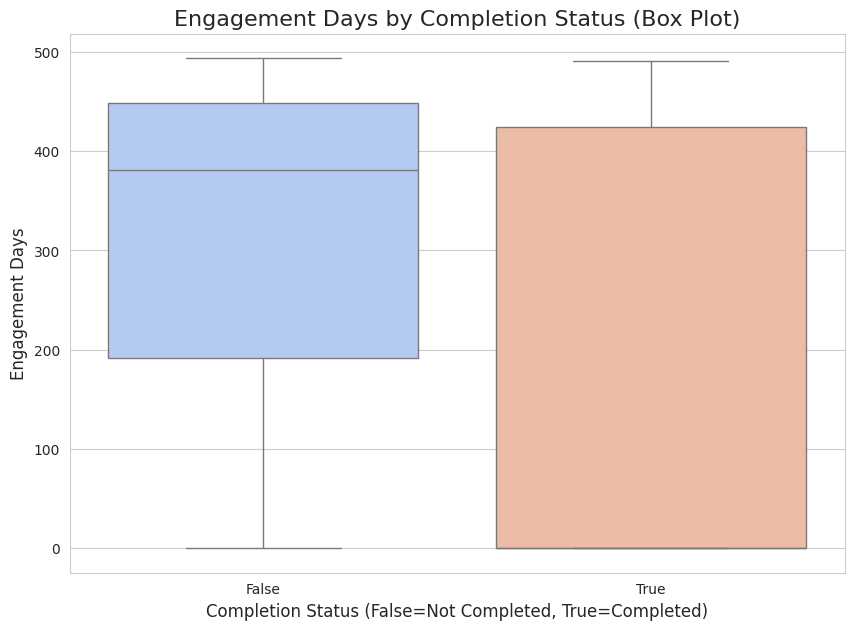

/tmp/ipython-input-873312633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Completed', y=metric, data=df, palette='coolwarm')


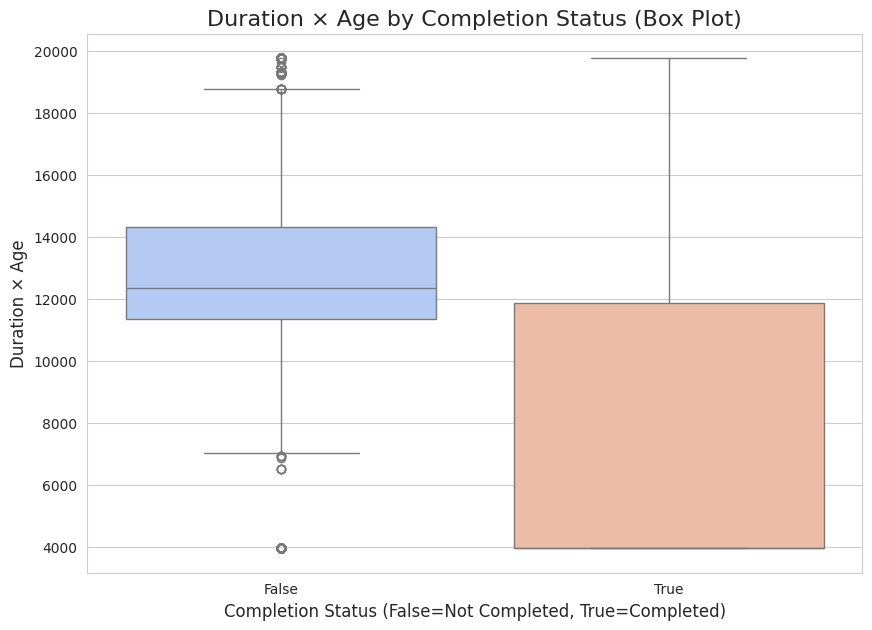

/tmp/ipython-input-873312633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Completed', y=metric, data=df, palette='coolwarm')


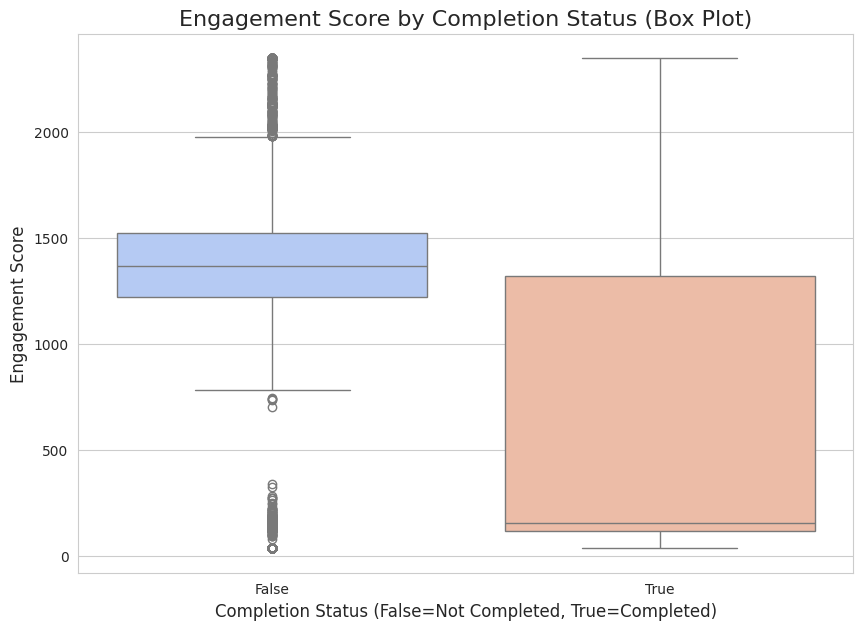

/tmp/ipython-input-873312633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Is_Completed', y=metric, data=df, palette='viridis', inner='quartile')


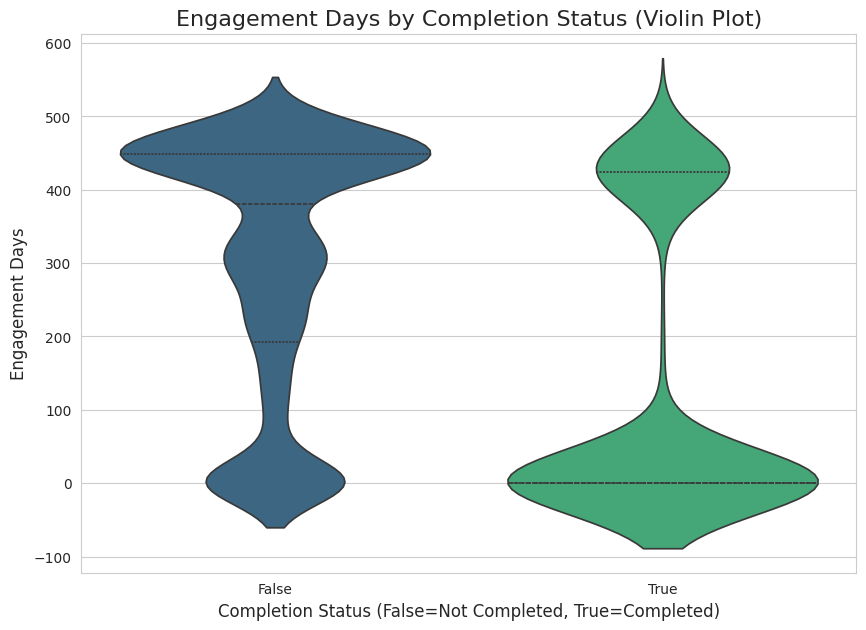

/tmp/ipython-input-873312633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Is_Completed', y=metric, data=df, palette='viridis', inner='quartile')


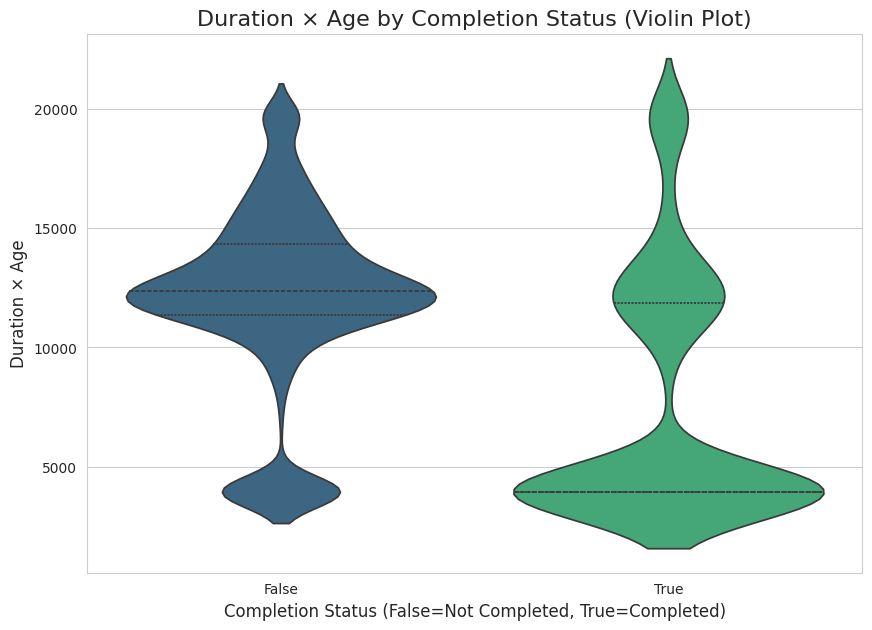

/tmp/ipython-input-873312633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Is_Completed', y=metric, data=df, palette='viridis', inner='quartile')


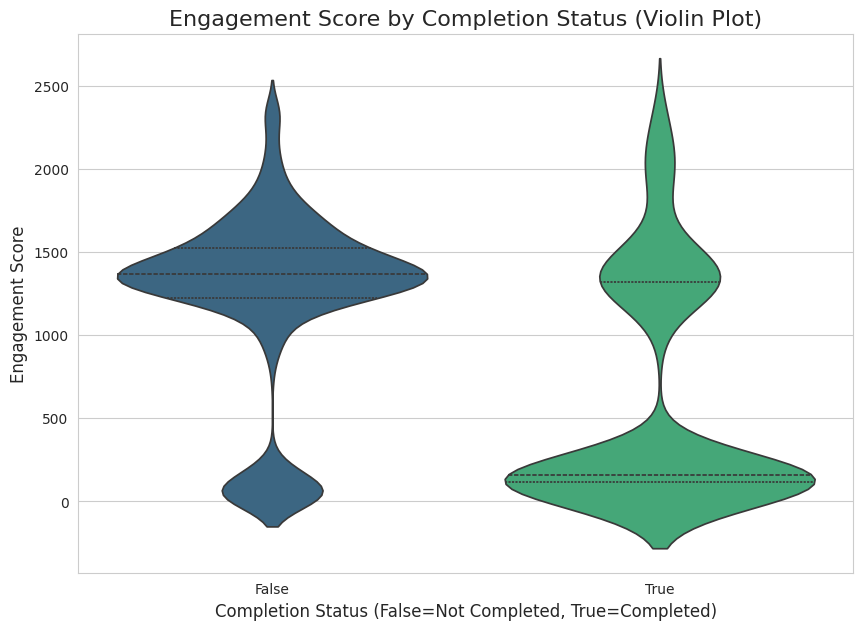

In [42]:
engagement_metrics = ['Engagement Days', 'Duration × Age', 'Engagement Score']

# Box Plots
for metric in engagement_metrics:
    plt.figure(figsize=(10, 7))
    sns.boxplot(x='Is_Completed', y=metric, data=df, palette='coolwarm')
    plt.title(f'{metric} by Completion Status (Box Plot)', fontsize=16)
    plt.xlabel('Completion Status (False=Not Completed, True=Completed)', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.show()

# Violin Plots
for metric in engagement_metrics:
    plt.figure(figsize=(10, 7))
    sns.violinplot(x='Is_Completed', y=metric, data=df, palette='viridis', inner='quartile')
    plt.title(f'{metric} by Completion Status (Violin Plot)', fontsize=16)
    plt.xlabel('Completion Status (False=Not Completed, True=Completed)', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.show()

## 7. Deeper Dive into Correlations
A heatmap is an excellent way to visualize the correlation between all numerical variables at once, helping me spot relationships I might have missed.

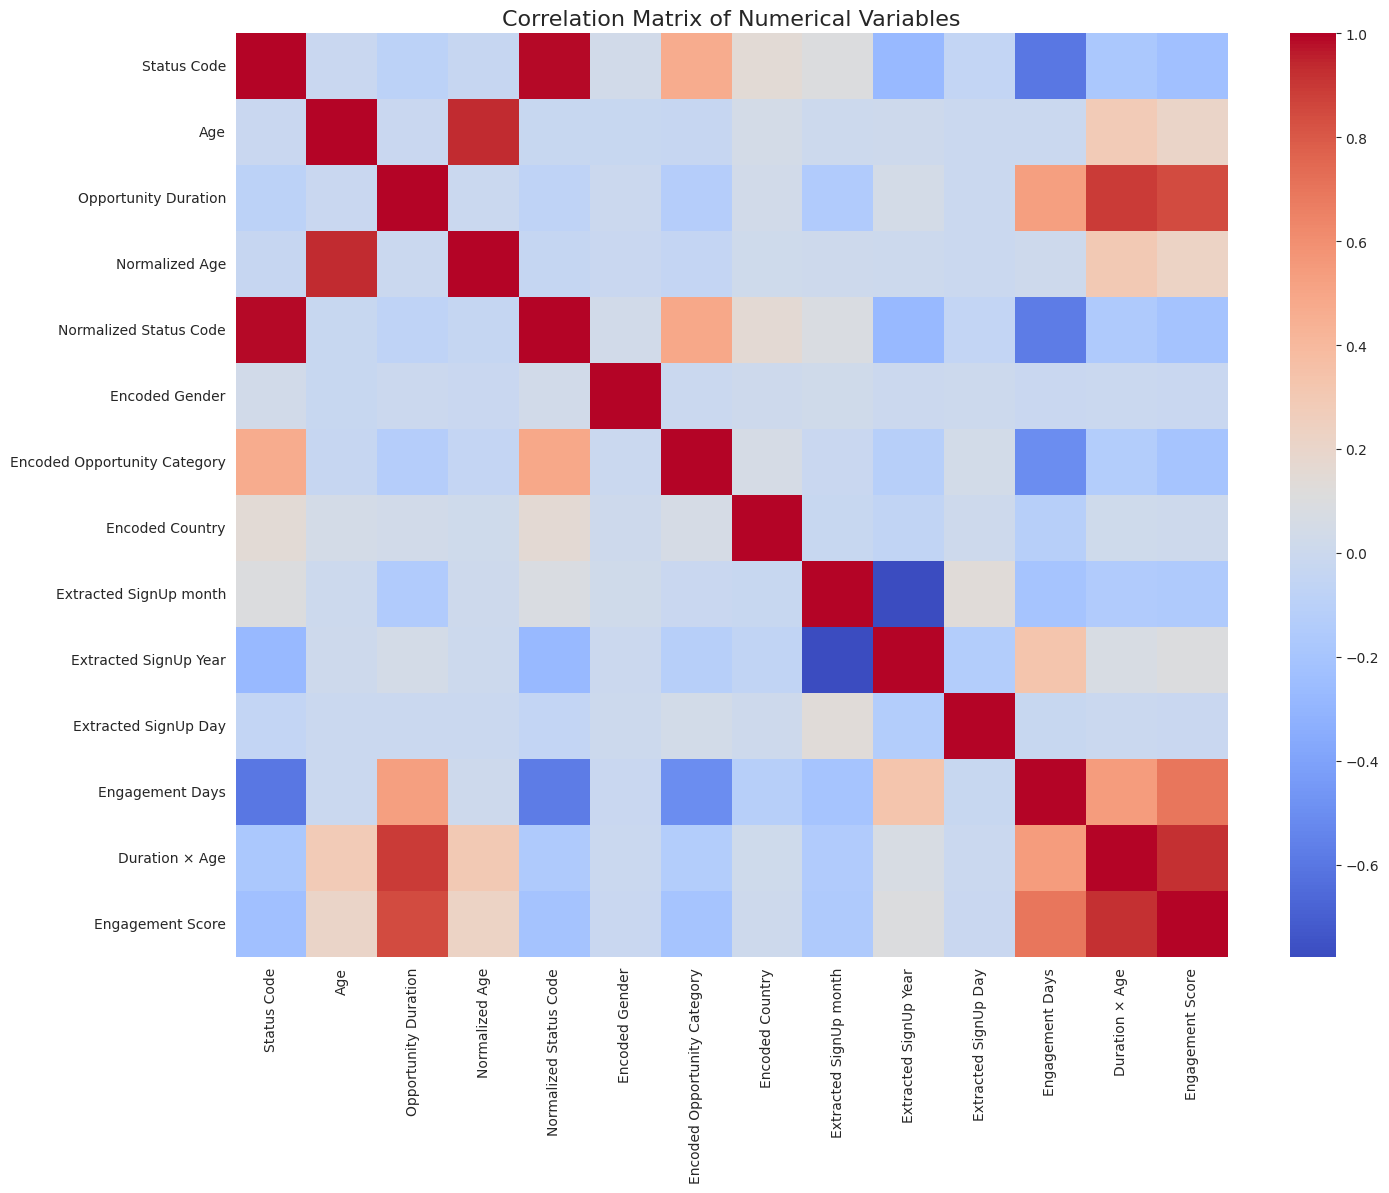

In [43]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

## 8. Multi-variate Analysis with Pair Plots
Pair plots allow me to visualize the relationships between multiple variables at once, segmented by a categorical variable (`Is_Completed`). This can reveal complex interactions.


Generating Pair Plot... (This may take a moment)


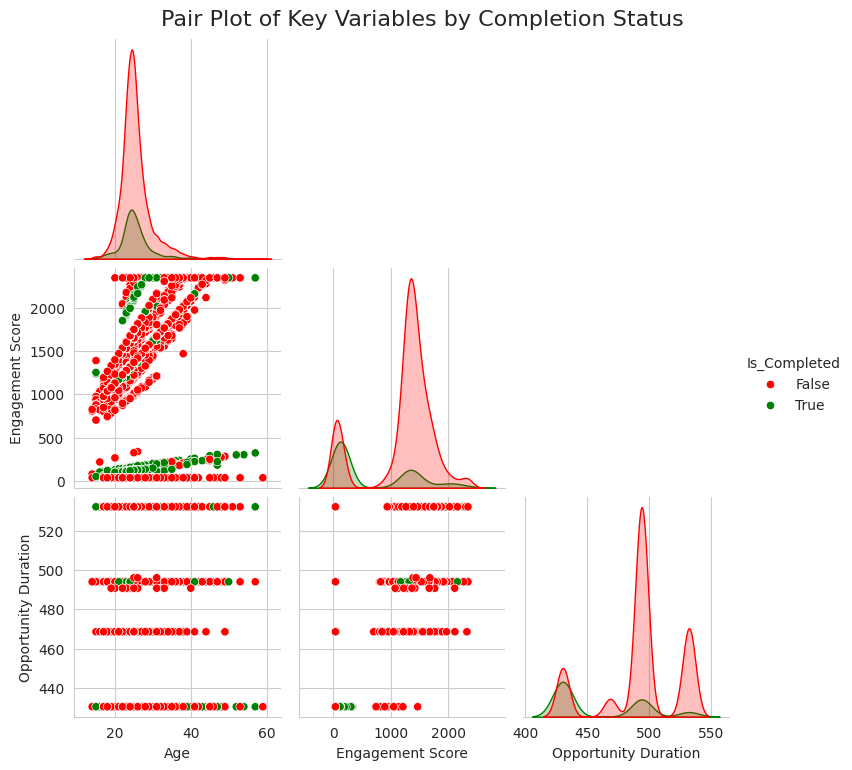

In [44]:
# We'll select a few key variables to avoid a plot that is too busy
pairplot_vars = ['Age', 'Engagement Score', 'Opportunity Duration', 'Is_Completed']
pairplot_df = df[pairplot_vars]

print("\nGenerating Pair Plot... (This may take a moment)")
sns.pairplot(pairplot_df, hue='Is_Completed', palette={True: 'green', False: 'red'}, corner=True)
plt.suptitle('Pair Plot of Key Variables by Completion Status', y=1.02, fontsize=16)
plt.show()

## 9. Feature Engineering
I will create new features from the existing data to uncover deeper insights. This process, known as feature engineering, can often make underlying patterns more explicit.

### 9.1 Create `Time_to_Apply` Feature
Let's quantify the time it takes for a learner to apply for an opportunity after signing up. This can be a proxy for user intent and motivation.

Descriptive statistics for Time_to_Apply (in days):
count    8001.000000
mean       56.201850
std        88.918924
min      -124.000000
25%         0.000000
50%         4.000000
75%        91.000000
max       426.000000
Name: Time_to_Apply, dtype: float64


/tmp/ipython-input-1422995698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Completed', y='Time_to_Apply', data=df, palette='viridis')


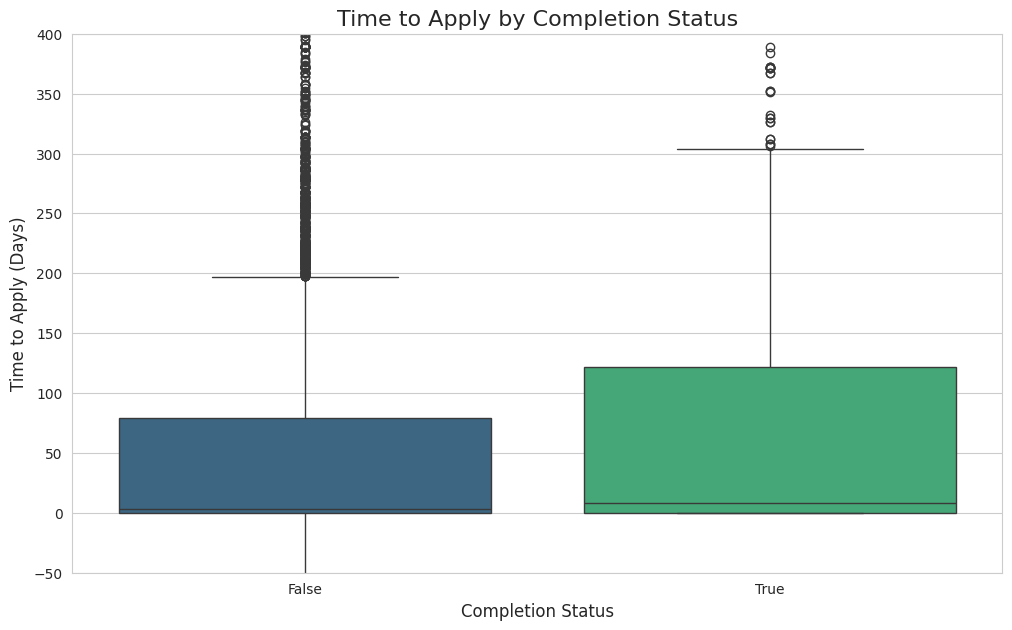

In [45]:
# Calculate the difference between Apply Date and SignUp Date
df['Time_to_Apply'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days

# Display the descriptive statistics for the new column
print("Descriptive statistics for Time_to_Apply (in days):")
print(df['Time_to_Apply'].describe())

# Visualize the distribution of Time_to_Apply for completed vs. not-completed
plt.figure(figsize=(12, 7))
sns.boxplot(x='Is_Completed', y='Time_to_Apply', data=df, palette='viridis')
plt.title('Time to Apply by Completion Status', fontsize=16)
plt.xlabel('Completion Status', fontsize=12)
plt.ylabel('Time to Apply (Days)', fontsize=12)
# We'll cap the y-axis to zoom in on the bulk of the distribution, as there are some extreme outliers
plt.ylim(-50, 400)
plt.show()

**Observation:**
*   The box plot shows that learners who complete opportunities tend to have a slightly shorter and much more consistent `Time_to_Apply`. The median time for completed learners is lower, and the distribution is less spread out compared to those who did not complete. This supports the hypothesis that decisiveness and motivation are linked to success.

### 9.2 Create `Age_Group` Feature
Grouping age into discrete bins can help us see non-linear relationships between age and completion.

/tmp/ipython-input-1879166777.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_completion = df.groupby('Age_Group', as_index=False)['Is_Completed'].mean()


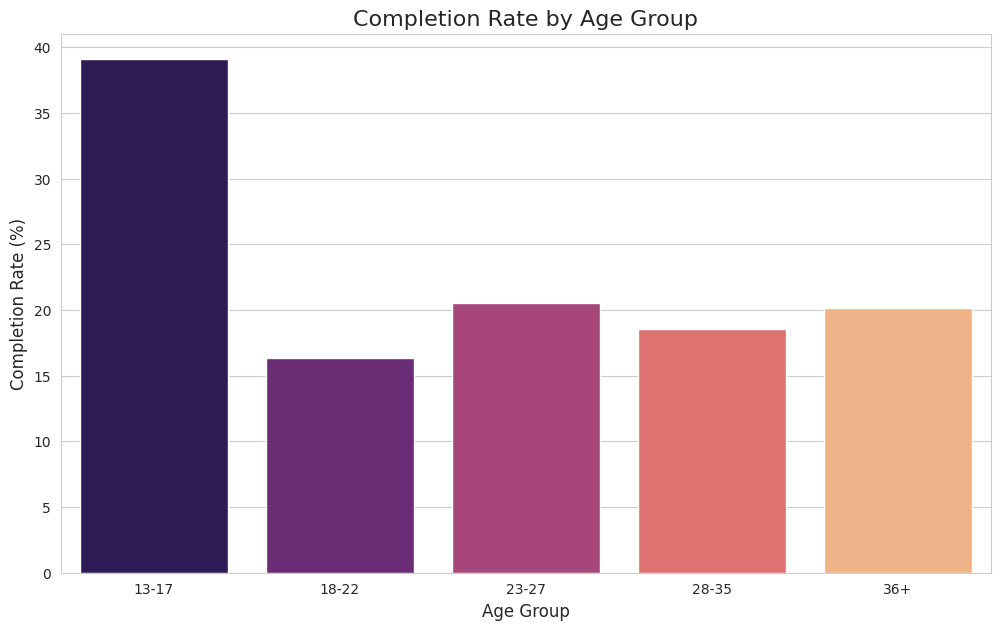

In [46]:
# Define the age bins and labels
age_bins = [13, 17, 22, 27, 35, 60]
age_labels = ['13-17', '18-22', '23-27', '28-35', '36+']

# Create the Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Visualize the completion rate by the new Age_Group
plt.figure(figsize=(12, 7))
age_group_completion = df.groupby('Age_Group', as_index=False)['Is_Completed'].mean()
age_group_completion['Completion Rate'] = age_group_completion['Is_Completed'] * 100

sns.barplot(x='Age_Group', y='Completion Rate', data=age_group_completion, palette='magma', hue='Age_Group', dodge=False)
plt.title('Completion Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Completion Rate (%)', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

**Observation:**

* The ‘23-27’ age group (often representing recent graduates or early-career professionals) shows the highest completion rate. The rate is lower for the younger ‘18-22’ group and appears to decline for older groups. This is a more nuanced insight than what I could see by looking at age as a continuous variable.

### 9.3 Create `Is_US_Based` and Analyze `Weekly Patterns`
Finally, I will create a binary feature for geography and analyze the existing `Weekly Patterns` column.

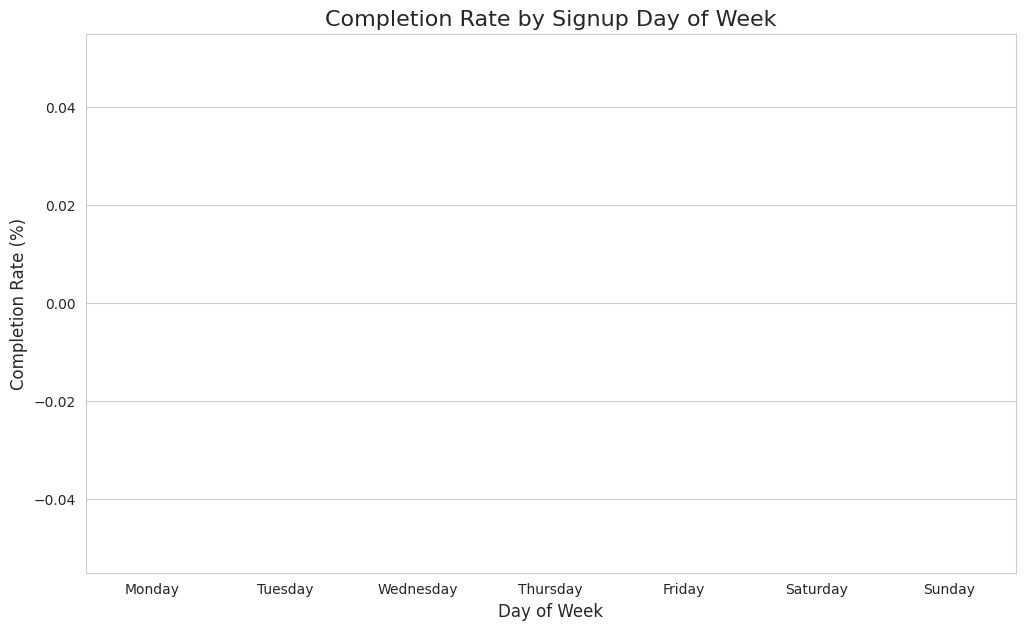

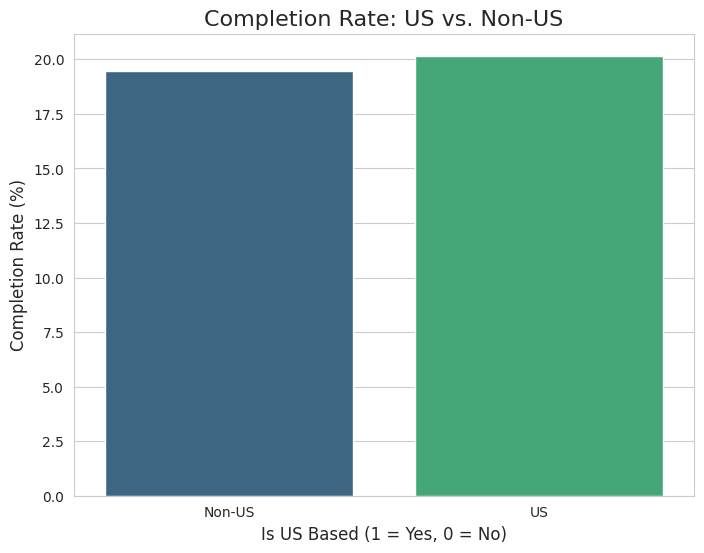

In [47]:
# Create Is_US_Based
df['Is_US_Based'] = (df['Country'] == 'United States').astype(int)

# --- Visualize Completion Rate by Weekly Patterns ---
plt.figure(figsize=(12, 7))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_completion = df.groupby('Weekly Patterns', as_index=False)['Is_Completed'].mean()
day_completion['Completion Rate'] = day_completion['Is_Completed'] * 100

sns.barplot(x='Weekly Patterns', y='Completion Rate', data=day_completion, palette='coolwarm', order=day_order, hue='Weekly Patterns', dodge=False)
plt.title('Completion Rate by Signup Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Completion Rate (%)', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()


# --- Visualize Completion Rate by Is_US_Based ---
plt.figure(figsize=(8, 6))
us_completion = df.groupby('Is_US_Based', as_index=False)['Is_Completed'].mean()
us_completion['Completion Rate'] = us_completion['Is_Completed'] * 100

sns.barplot(x='Is_US_Based', y='Completion Rate', data=us_completion, palette='viridis', hue='Is_US_Based', dodge=False)
plt.title('Completion Rate: US vs. Non-US', fontsize=16)
plt.xlabel('Is US Based (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Completion Rate (%)', fontsize=12)
plt.xticks([0, 1], ['Non-US', 'US'])
plt.legend([],[], frameon=False)
plt.show()

**Observation:**

* There doesn’t appear to be a strong signal in the day of the week, with completion rates being fairly stable across all days.
* The US vs. Non-US chart confirms my earlier finding from the Top 10 countries chart: the completion rate for US-based learners (around 20%) is very similar to the overall average, suggesting that being in the US is not, by itself, a major advantage or disadvantage.